# Importar librerías



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Cargar y combinar conjuntos de datos

- El archivo denominado winequality-red.csv contiene el conjunto de datos correspondiente a 1599
registros de muestras de vino tinto
- El archivo denominado winequality-white.csv contiene el conjunto de datos correspondiente a 4898
registros de muestras de vino blanco
- El archivo denominado winequality.names contiene información detallada y el diccionario de datos
de los conjuntos de datos

In [2]:
from google.colab import files
uploaded = files.upload()

import io

white_wine = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep=";")
red_wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']),sep=";")

#white_wine = pd.read_csv('winequality-white.csv', sep=';')
#red_wine = pd.read_csv('winequality-red.csv', sep=';')



Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [3]:
# guarda el tipo de vino como atributo
red_wine['wine_type'] = 'tinto'   
white_wine['wine_type'] = 'blanco'
# puntajes de calidad de vino agrupados en etiquetas
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'baja' 
                                                          if value <= 5 else 'media' 
                                                              if value <= 7 else 'alta')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['baja', 'media', 'alta'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'baja' 
                                                              if value <= 5 else 'media' 
                                                                  if value <= 7 else 'alta')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['baja', 'media', 'alta'])

# combinamos los conjuntos de datos de vino tinto y blanco
wines = pd.concat([red_wine, white_wine])
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
print(white_wine.shape, red_wine.shape)
print(wines.info())

(4898, 14) (1599, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,blanco,alta
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,tinto,baja
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,blanco,media
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,blanco,media
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,blanco,media


### Entender el vino y sus tipos

El vino es una bebida alcohólica elaborada a partir de la uva que se fermenta sin añadir azúcares, ácidos, enzimas, agua u otros nutrientes

El vino tinto se elabora a partir de uvas de color rojo oscuro y negro. El color suele oscilar entre varios tonos de rojo, marrón y violeta. Se elabora con uvas enteras, incluida la piel, lo que contribuye al color y al sabor de los vinos tintos, dándoles un rico sabor.

El vino blanco se elabora con uvas blancas sin hollejos ni semillas. El color suele ser amarillo pajizo, amarillo verdoso o amarillo dorado. La mayoría de los vinos blancos tienen un sabor ligero y afrutado en comparación con los vinos tintos más ricos.

### Entender los atributos y propiedades del vino 


- **Acidez fija:** Los ácidos son una de las propiedades fundamentales del vino y contribuyen en gran medida al sabor del mismo. Reducir los ácidos de forma significativa puede hacer que los vinos tengan un sabor plano. Los ácidos fijos incluyen los ácidos tartárico, málico, cítrico y succínico que se encuentran en las uvas (excepto el succínico). Esta variable suele expresarse en $\frac{g(ácido tartárico)}{dm^3}$ en el conjunto de datos.


- **Acidez volátil:** Estos ácidos deben ser destilados del vino antes de completar el proceso de producción. Están constituidos principalmente por el ácido acético, aunque también pueden estar presentes otros ácidos como el láctico, el fórmico y el butírico. El exceso de ácidos volátiles es indeseable y provoca un sabor desagradable. En EE.UU., los límites legales de acidez volátil son 1,2 g/L para el vino tinto de mesa y 1,1 g/L para el vino blanco de mesa. La acidez volátil se expresa en $\frac{g(ácido acético)}{dm^3}$ en el conjunto de datos.


- **Ácido cítrico:** Es uno de los ácidos fijos que da al vino su frescura. Normalmente la mayor parte se consume durante el proceso de fermentación y a veces se añade por separado para dar más frescura al vino. Suele expresarse en $\frac{g}{dm^3}$ en el conjunto de datos.


- **Azúcar residual:** Suele referirse al azúcar natural de la uva que queda después de que el proceso de fermentación se detenga, o se pare. Suele expresarse en $\frac{g}{dm^3}$ en el conjunto de datos.


- **Cloruros:** Suele ser uno de los principales contribuyentes a la salinidad del vino. Suele expresarse en $\frac{g(cloruro de sodio)}{dm^3}$ en el conjunto de datos.


- **Dióxido de azufre libre:** Es la parte del dióxido de azufre que cuando se añade a un vino se dice que está libre después de que la parte restante se ligue. Los vinicultores siempre intentarán conseguir la mayor proporción de azufre libre para que se ligue. También se conocen como sulfitos y su exceso es indeseable y da un olor acre. Esta variable se expresa en $\frac{mg}{dm^3}$ en el conjunto de datos.


- **Dióxido de azufre total:** Es la suma total del dióxido de azufre ligado y libre ($SO_2$). Aquí se expresa en $\frac{mg}{dm^3}$. Se añade principalmente para matar las bacterias dañinas y preservar la calidad y la frescura. Suele haber límites legales para los niveles de azufre en los vinos y su exceso puede incluso matar a las buenas levaduras y desprender un olor indeseable.


- **Densidad:** Se puede representar como una comparación del peso de un volumen específico de vino con un volumen equivalente de agua. Generalmente se utiliza como medida de la conversión del azúcar en alcohol. Aquí se expresa en $\frac{g}{cm^3}$.


- **PH:** También conocido como potencial de hidrógeno, es una escala numérica para especificar la acidez o la basicidad del vino. La acidez fija es la que más contribuye al pH de los vinos. Como sabrá, las soluciones con un pH inferior a 7 son ácidas, mientras que las soluciones con un pH superior a 7 son básicas. Con un pH de 7, el agua pura es neutra. La mayoría de los vinos tienen un pH entre 2,9 y 3,9 y, por tanto, son ácidos.


- **Sulfatos:** Son sales minerales que contienen azufre. Los sulfatos son para el vino lo mismo que el gluten para los alimentos. Forman parte habitual de la elaboración del vino en todo el mundo y se consideran esenciales. Están relacionados con el proceso de fermentación y afectan al aroma y sabor del vino. Aquí se expresa en $\frac{g(potasio-sulfato)}{dm^3}$ en el conjunto de datos.


- **Alcohol:** El vino es una bebida alcohólica. El alcohol se forma como resultado de la conversión del azúcar por parte de la levadura durante el proceso de fermentación. El porcentaje de alcohol puede variar de un vino a otro. De ahí que no sea una sorpresa que este atributo forme parte de este conjunto de datos. Suele medirse en % vol o alcohol por volumen (ABV).


- **calidad:** Los expertos en vino califican la calidad del vino entre 0 (muy malo) y 10 (muy excelente). La puntuación de calidad final es la mediana de al menos tres evaluaciones realizadas por los mismos expertos en vino.


- **Tipo de vino:** Como originalmente teníamos dos conjuntos de datos para el vino tinto y el blanco, introdujimos este atributo en el conjunto de datos final fusionado que indica el tipo de vino para cada punto de datos. Un vino puede ser "tinto" o "blanco". Uno de los modelos predictivos que construiremos en este capítulo sería tal que pudiéramos predecir el tipo de vino mirando otros atributos del vino.

- **Etiqueta_de_calidad:** Es un atributo derivado del atributo "calidad". Agrupamos las puntuaciones de calidad del vino en tres categorías cualitativas: baja, media y alta. Los vinos con una puntuación de calidad de 3, 4 y 5 son de baja calidad, las puntuaciones de 6 y 7 son de calidad media y las puntuaciones de 8 y 9 son vinos de alta calidad. En este capítulo también construiremos otro modelo para predecir esta etiqueta de calidad del vino en función de otros atributos del mismo. 

# Análisis exploratorio y visualización

## Estadística descriptiva

In [6]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                       ... White Wine Statistics         
           residual sugar total sulfur dioxide  ...      volatile acidity  quality
count             1599.00              1599.00  ...               4898.00  4898.00
mean                 2.54                46.47  ...                  0.28     5.88
std                  1.41                32.90  ...                  0.10     0.89
min                  0.90                 6.00  ...                  0.08     3.00
25%                  1.90                22.00  ...                  0.21     5.00
50%                  2.20                38.00  ...                  0.26     6.00
75%                  2.60                62.00  ...                  0.32     6.00
max                 15.50               289.00  ...                  1.10     9.00

[8 rows x 12 columns]

In [7]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'baja'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'media'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'alta'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Vino de baja calidad', 'Vino de calidad media', 'Vino de calidad alta'])

Vino de baja calidad                   ... Vino de calidad alta        
                   alcohol volatile acidity  ...                   pH quality
count              2384.00          2384.00  ...               198.00  198.00
mean                  9.87             0.40  ...                 3.23    8.03
std                   0.84             0.19  ...                 0.16    0.16
min                   8.00             0.10  ...                 2.88    8.00
25%                   9.30             0.26  ...                 3.13    8.00
50%                   9.60             0.34  ...                 3.23    8.00
75%                  10.40             0.50  ...                 3.33    8.00
max                  14.90             1.58  ...                 3.72    9.00

[8 rows x 12 columns]

## Estadística inferencial

La noción general de la estadística inferencial consiste en extraer inferencias y proposiciones de una población utilizando una
muestra de datos. La idea es utilizar métodos y modelos estadísticos para realizar inferencias estadísticas a partir de una
hipótesis. Cada hipótesis consta de una hipótesis nula y una hipótesis alternativa. A partir de los resultados de la prueba estadística, si el resultado es estadísticamente significativo según los niveles de significación preestablecidos (por ejemplo, si el p-valor es inferior al 5% de nivel de significación), rechazamos la hipótesis nula a favor de la hipótesis alternativa.

En caso contrario, si los resultados no son estadísticamente significativos, concluimos que nuestra hipótesis nula era correcta.
Volviendo a nuestro problema de la sección anterior, dados los múltiples grupos de datos o subconjuntos
de muestras de vino basadas en la calificación de la calidad del vino, ¿hay alguna forma de demostrar que los niveles medios de alcohol o de pH varían
significativamente entre los grupos de datos?

Un gran modelo estadístico para probar o refutar la diferencia de medias entre subconjuntos de datos es utilizar
la prueba ANOVA de una vía. ANOVA significa "análisis de la varianza", que es un modelo estadístico ingenioso y puede
puede utilizarse para analizar las diferencias estadísticamente significativas entre las medias o promedios de varios grupos. Esto se
Esto se consigue básicamente utilizando una prueba estadística que nos ayuda a determinar si las medias de varios grupos
son iguales. Normalmente, la hipótesis nula se representa como

$H_{0} : μ_{1} = μ_{2} = μ_{3} = ... = μ_{n}$

donde n es el número de grupos o subconjuntos de datos e indica que las medias de grupo de los distintos
grupos no son muy diferentes entre sí según los niveles de significación estadística. La hipótesis alternativa, $H_{A}$, nos dice que existen al menos dos medias de grupo que son estadísticamente significativas
entre sí. Normalmente se utiliza el estadístico F y el valor p asociado para determinar la significación estadística. Normalmente, un valor p inferior a 0,05 se considera un resultado estadísticamente significativo en el que rechazamos
la hipótesis nula a favor de la original. Recomendamos la lectura de un libro estándar sobre estadística inferencial para profundizar en estos conceptos.

Para nuestro escenario, se crean tres subconjuntos o grupos de datos a partir de las calificaciones de la calidad del vino. Los
valores medios en la primera prueba se basarían en el contenido de alcohol del vino y la segunda prueba se basaría
en los niveles de pH del vino. Supongamos también que la hipótesis nula es que las medias de los grupos de vino de calidad baja, media y alta son las mismas, y que la hipótesis alternativa sería que hay una diferencia (estadísticamente significativa)
entre al menos dos medias de grupo. El siguiente fragmento nos ayuda a realizar la prueba ANOVA.

In [8]:
from scipy import stats
 
F, p = stats.f_oneway(wines[wines['quality_label'] == 'baja']['alcohol'], 
                      wines[wines['quality_label'] == 'media']['alcohol'], 
                      wines[wines['quality_label'] == 'alta']['alcohol'])
print('Prueba ANOVA para los niveles medios de alcohol en las muestras de vino con diferentes calificaciones de calidad')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'baja']['pH'], 
                      wines[wines['quality_label'] == 'media']['pH'], 
                      wines[wines['quality_label'] == 'alta']['pH'])
print('\nPrueba ANOVA para los niveles medios de pH en las muestras de vino con diferentes calificaciones de calidad')
print('F Statistic:', F, '\tp-value:', p)

Prueba ANOVA para los niveles medios de alcohol en las muestras de vino con diferentes calificaciones de calidad
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266

Prueba ANOVA para los niveles medios de pH en las muestras de vino con diferentes calificaciones de calidad
F Statistic: 1.2363860803545201 	p-value: 0.2905002779768688


De los resultados anteriores podemos ver claramente que tenemos un valor p muy inferior a 0,05 en la primera prueba y
superior a 0,05 en la segunda prueba. Esto nos indica que existe una diferencia estadísticamente significativa en las medias del nivel de alcohol
para al menos dos de los tres grupos (rechazando la hipótesis nula a favor de la alternativa).
Sin embargo, en el caso de las medias del nivel de pH, no rechazamos la hipótesis nula y, por tanto, concluimos que las medias del nivel de pH
de los tres grupos no son significativamente diferentes desde el punto de vista estadístico. Incluso podemos visualizar estas
dos características y observar las medias utilizando el siguiente código.


Text(0, 0.5, 'pH')

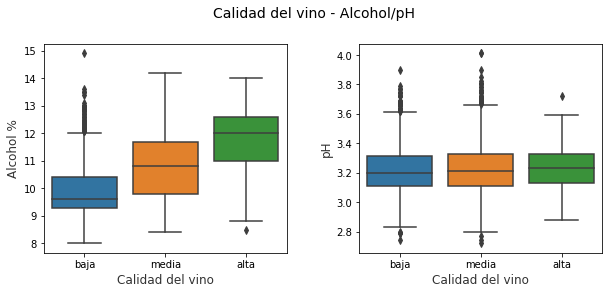

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Calidad del vino - Alcohol/pH', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_label", y="alcohol",
            data=wines, ax=ax1)
ax1.set_xlabel("Calidad del vino",size = 12,alpha=0.8)
ax1.set_ylabel("Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Calidad del vino",size = 12,alpha=0.8)
ax2.set_ylabel("pH",size = 12,alpha=0.8)

¿Puedes encontrar patrones más interesantes e
hipótesis con otras características de estos datos?

## Análisis univariado

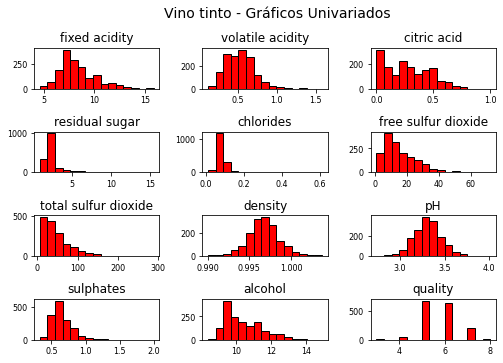

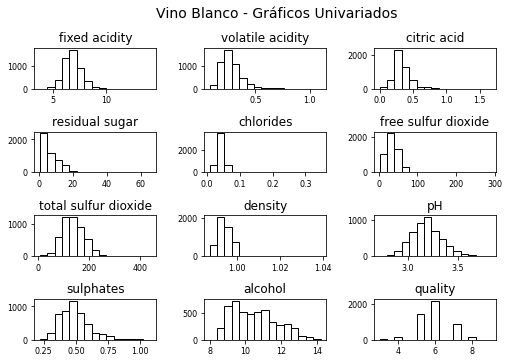

In [10]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Vino tinto - Gráficos Univariados', x=0.65, y=1.25, fontsize=14)  

white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('Vino Blanco - Gráficos Univariados', x=0.65, y=1.25, fontsize=14)    

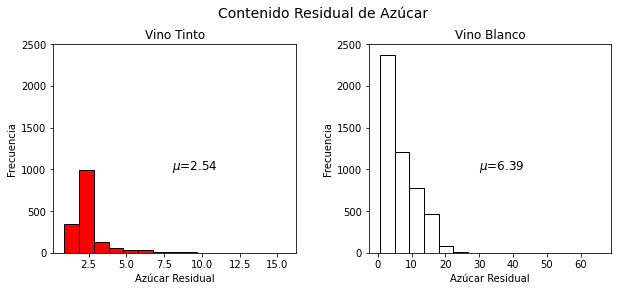

In [11]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Contenido Residual de Azúcar", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Azúcar Residual")
ax1.set_ylabel("Frecuencia") 
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Azúcar Residual")
ax2.set_ylabel("Frecuencia")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

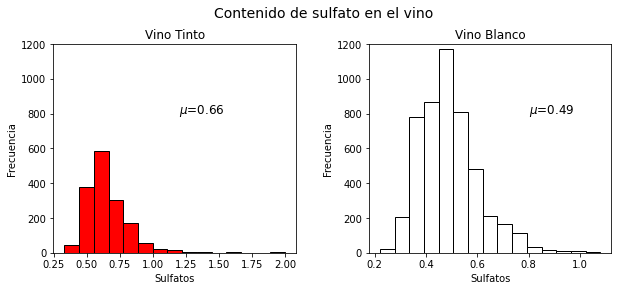

In [12]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Contenido de sulfato en el vino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Sulfatos")
ax1.set_ylabel("Frecuencia") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Sulfatos")
ax2.set_ylabel("Frecuencia")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

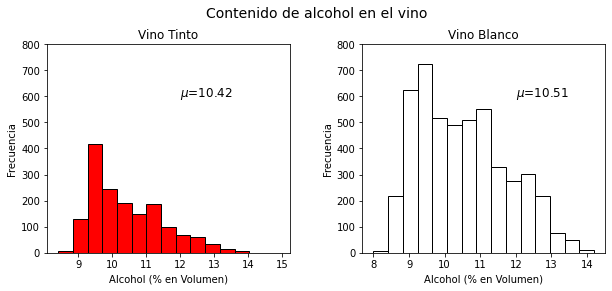

In [13]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Contenido de alcohol en el vino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Alcohol (% en Volumen)")
ax1.set_ylabel("Frecuencia") 
ax1.set_ylim([0, 800])
ax1.text(12, 600, r'$\mu$='+str(round(red_wine['alcohol'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['alcohol'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Alcohol (% en Volumen)")
ax2.set_ylabel("Frecuencia")
ax2.set_ylim([0, 800])
ax2.text(12, 600, r'$\mu$='+str(round(white_wine['alcohol'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['alcohol'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

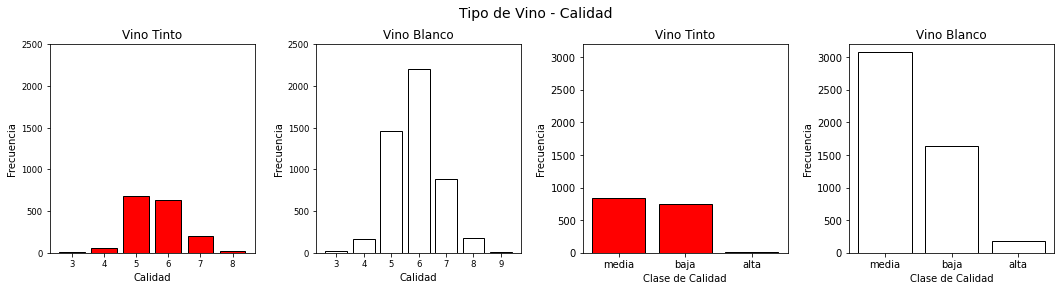

In [14]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Tipo de Vino - Calidad", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Calidad")
ax1.set_ylabel("Frecuencia") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Calidad")
ax2.set_ylabel("Frecuencia") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Vino Tinto")
ax3.set_xlabel("Clase de Calidad")
ax3.set_ylabel("Frecuencia") 
rw_q = red_wine['quality_label'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', 
        edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("Vino Blanco")
ax4.set_xlabel("Clase de Calidad")
ax4.set_ylabel("Frecuencia") 
ww_q = white_wine['quality_label'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', 
        edgecolor='black', linewidth=1, tick_label =ww_q[0])

## Análisis multivariado

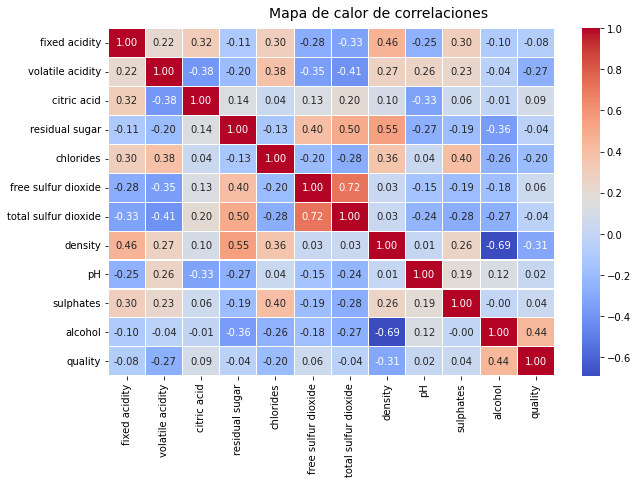

In [15]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mapa de calor de correlaciones', fontsize=14)

Aunque la mayoría de las correlaciones son débiles, como se observa en la figura, podemos ver una fuerte correlación negativa
entre la densidad y el alcohol y una fuerte correlación positiva entre el dióxido de azufre total y libre, lo cual es de esperar. También se pueden visualizar patrones y relaciones entre múltiples variables
utilizando gráficos por pares y utilizando diferentes tonos para los tipos de vino, esencialmente trazando tres variables a la vez.
El siguiente código muestra un gráfico de pares para algunas características de nuestro conjunto de datos.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


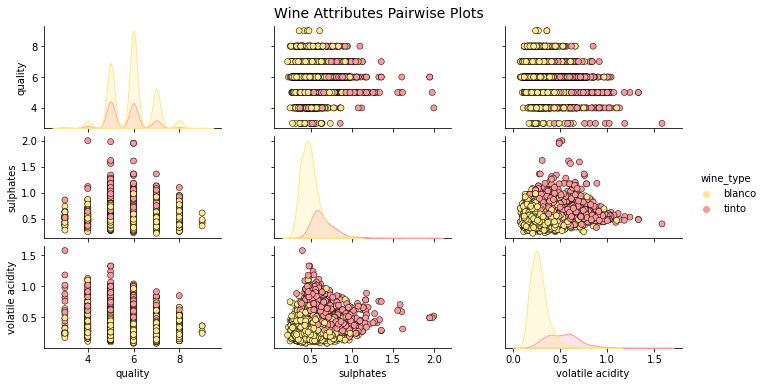

In [16]:
cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"tinto": "#FF9999", "blanco": "#FFE888"},plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

A partir de los gráficos podemos observar varios patrones interesantes, que están en consonancia con algunas ideas que obtuvimos anteriormente. Estas observaciones incluyen lo siguiente:
- Presencia de mayores niveles de sulfato en los vinos tintos en comparación con los blancos
- Niveles más bajos de sulfatos en los vinos con alta calificación de calidad
- Niveles más bajos de ácidos volátiles en los vinos con calificaciones de alta calidad
- Presencia de mayores niveles de ácidos volátiles en los vinos tintos en comparación con los blancos

Puede utilizar gráficos similares en otras variables y características para descubrir más patrones y relaciones.
Para observar las relaciones entre características con una visión más microscópica, los gráficos conjuntos son excelentes herramientas de visualización
de visualización específicas para las visualizaciones multivariantes. El siguiente código muestra la relación entre los
tipos de vino, los sulfatos y las calificaciones de calidad.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


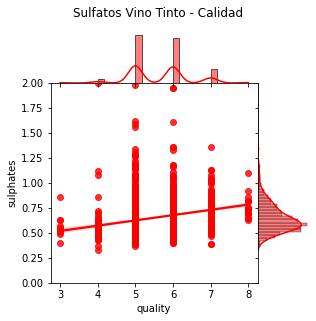

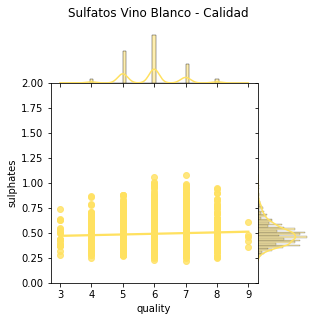

In [17]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
                   kind='reg', ylim=(0, 2),  
                   color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Sulfatos Vino Tinto - Calidad', fontsize=12)

wj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
                   kind='reg', ylim=(0, 2),
                   color='#FFE160', space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Sulfatos Vino Blanco - Calidad', fontsize=12)

Aunque parece haber un patrón que muestra niveles de sulfato más bajos para las muestras de vino de mayor calidad
la correlación es bastante débil. Sin embargo, vemos claramente que los niveles de sulfato
del vino tinto son mucho más altos que los del vino blanco. En este caso hemos visualizado tres
características (tipo, calidad y sulfatos) con la ayuda de dos gráficos. ¿Y si quisiéramos visualizar un mayor número de características y determinar patrones a partir de ellas? El marco de trabajo de Seaborn ofrece cuadrículas de facetas que
nos ayudan a visualizar un mayor número de variables en gráficos bidimensionales. Intentemos visualizar las relaciones
entre el tipo de vino, los índices de calidad, la acidez volátil y los niveles de volumen de alcohol.

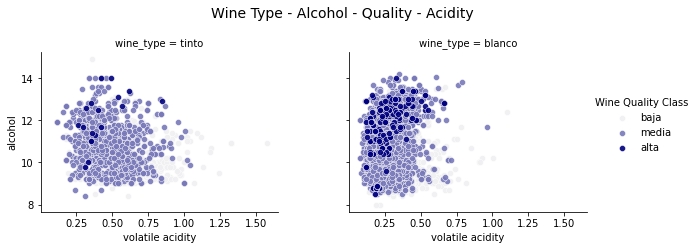

In [18]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['tinto', 'blanco'], hue_order=['baja', 'media', 'alta'],
                  aspect=1.2, height=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

El gráfico nos muestra algunos patrones interesantes. No sólo somos capaces de visualizar con éxito
cuatro variables, sino que también podemos ver relaciones significativas entre ellas. Las muestras de vino de mayor calidad
(representadas por tonos más oscuros) tienen niveles más bajos de acidez volátil y niveles más altos de contenido de alcohol en comparación con las muestras de vino con calificaciones medias y bajas.
en comparación con las muestras de vino de calidad media y baja. Además, también podemos ver que los niveles de acidez volátil
son ligeramente inferiores en las muestras de vino blanco en comparación con las de vino tinto.

Construyamos ahora una visualización similar. En este caso, queremos analizar los patrones de los tipos de vino, calidad, dióxido de azufre y niveles de acidez. Para ello, podemos utilizar el mismo marco de trabajo que nuestro último fragmento de código para conseguirlo.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


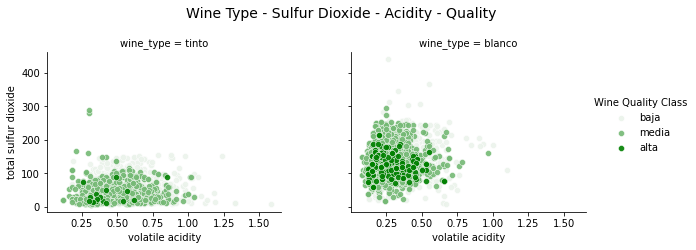

In [19]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['tinto', 'blanco'], hue_order=['baja', 'media', 'alta'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Podemos interpretar fácilmente de la figura que la acidez volátil así como el dióxido de azufre total son
considerablemente menores en las muestras de vino de alta calidad. Además, el dióxido de azufre total es considerablemente mayor en las muestras de vino blanco en comparación con las muestras de vino tinto. 
Sin embargo, los niveles de acidez volátil son ligeramente inferiores en las muestras de vino blanco en comparación con las muestras de vino tinto, como también se ha observado en el gráfico anterior.

Una buena forma de visualizar características numéricas segmentadas por grupos (variables categóricas) es utilizar gráficos de caja. En nuestro conjunto de datos, ya hemos analizado la relación de los niveles de alcohol más altos con las calificaciones de calidad más altas
de las muestras de vino en la sección "Estadística inferencial". Intentemos visualizar la relación entre
los niveles de alcohol del vino agrupados por las calificaciones de calidad del vino. Vamos a generar dos gráficos para el contenido de alcohol del vino
frente a la calidad del vino y la etiqueta de calidad.

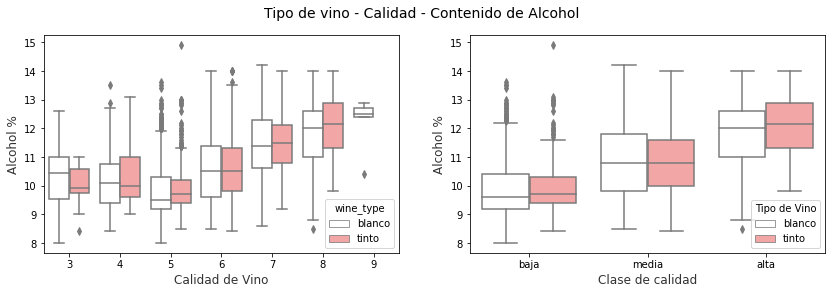

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Tipo de vino - Calidad - Contenido de Alcohol', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"tinto": "#FF9999", "blanco": "white"}, ax=ax1)
ax1.set_xlabel("Calidad de Vino",size = 12,alpha=0.8)
ax1.set_ylabel("Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"tinto": "#FF9999", "blanco": "white"}, ax=ax2)
ax2.set_xlabel("Clase de calidad",size = 12,alpha=0.8)
ax2.set_ylabel("Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Tipo de Vino')

Basándonos en nuestro anterior análisis de la calidad del vino frente al volumen de alcohol en la sección "Estadística inferencial"
estos resultados parecen coherentes. Cada recuadro de la figura muestra la distribución del nivel de alcohol
para un determinado grado de calidad del vino separado por tipos de vino. El propio recuadro representa el rango intercuartil
y la línea interior representa el valor medio de alcohol. Los "bigotes" indican el valor mínimo y máximo y los valores atípicos suelen representarse con puntos individuales. Podemos observar claramente que la distribución del alcohol en volumen tiene una tendencia creciente en las muestras de vino de mayor calidad. 

Del mismo modo, también podemos utilizar
para visualizar las distribuciones de las características numéricas sobre las características categóricas. Construyamos una visualización
para analizar la acidez fija de la muestra de vino según las calificaciones de calidad.

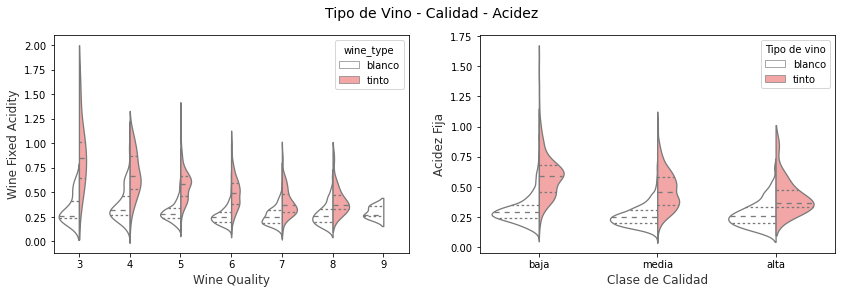

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Tipo de Vino - Calidad - Acidez', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"tinto": "#FF9999", "blanco": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"tinto": "#FF9999", "blanco": "white"}, ax=ax2)
ax2.set_xlabel("Clase de Calidad",size = 12,alpha=0.8)
ax2.set_ylabel("Acidez Fija",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Tipo de vino')

--------------------------------------------------------------------------------

En la figura, cada gráfico de violín representa típicamente el rango intercuartil con la mediana que se muestra
con líneas punteadas en esta figura. También se puede visualizar la distribución de los datos con las gráficas de densidad donde
representa la frecuencia. Así, además de la información que se obtiene de las gráficas de caja, también se puede visualizar la
distribución de los datos con las gráficas de violín. De hecho, en este caso hemos construido un gráfico de violín dividido que representa los dos tipos de
vino. Es bastante evidente que las muestras de vino tinto tienen una mayor acidez en comparación con sus homólogos de vino blanco.
También podemos ver una disminución general de la acidez con un vino de mayor calidad para las muestras de vino tinto, pero no tanto
para las muestras de vino blanco. 

Estos fragmentos de código y ejemplos deberían proporcionarle algunos buenos marcos y
para realizar un análisis exploratorio de datos eficaz en sus conjuntos de datos en el futuro.

# Prediciendo tipos de vino




In [22]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features, wtp_class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'blanco': 3418, 'tinto': 1129}) Counter({'blanco': 1480, 'tinto': 470})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Escalado

In [23]:
# Definir el escalador
wtp_ss = StandardScaler().fit(wtp_train_X)

# Escalar el conjunto de entrenamiento
wtp_train_SX = wtp_ss.transform(wtp_train_X)

# Escalar el conjunto de test
wtp_test_SX = wtp_ss.transform(wtp_test_X)

## Entrenar un modelo usando Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression()

## Predecir y Evaluar la performance de modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

       tinto       0.99      0.99      0.99       470
      blanco       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

[[1473    7]
 [   7  463]]


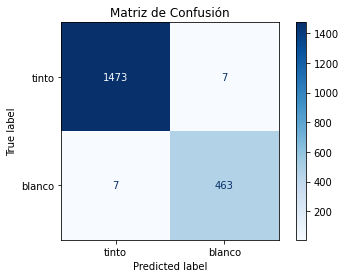

In [25]:
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

disp = plot_confusion_matrix(wtp_lr, wtp_test_SX, wtp_test_y,
                                 display_labels=['tinto', 'blanco'],
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wtp_test_y,wtp_lr_predictions,labels=['tinto', 'blanco']))
print(disp.confusion_matrix)


## Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


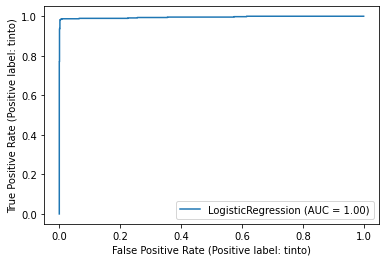

In [26]:

from sklearn.metrics import plot_roc_curve

plot_roc_curve(estimator=wtp_lr, X=wtp_test_SX, y=wtp_test_y)

# Prediciendo la calidad el vino

In [27]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['alta', 'baja', 'media'] # Importante: el clasificador toma las etiquetas por orden alfabético, el contador las devuelve por orden de # de entradas
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features, wqp_class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'media': 2737, 'baja': 1666, 'alta': 144}) Counter({'media': 1178, 'baja': 718, 'alta': 54})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Escalado

In [28]:
wqp_ss = StandardScaler().fit(wqp_train_X)

wqp_train_SX = wqp_ss.transform(wqp_train_X)

wqp_test_SX = wqp_ss.transform(wqp_test_X)

## Entrenar, Predecir & Evaluar un Modelo usando un Árbol de Decisión 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        alta       0.29      0.30      0.29        54
        baja       0.68      0.67      0.67       718
       media       0.77      0.78      0.78      1178

    accuracy                           0.72      1950
   macro avg       0.58      0.58      0.58      1950
weighted avg       0.72      0.72      0.72      1950

[[ 16   2  36]
 [  5 482 231]
 [ 34 229 915]]


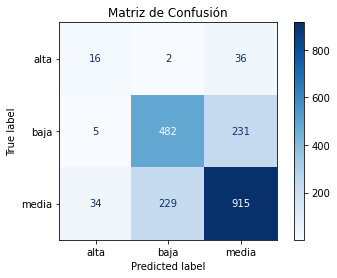

In [29]:
from sklearn.tree import DecisionTreeClassifier

wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

disp = plot_confusion_matrix(wqp_dt, wqp_test_SX, wqp_test_y,
                                 display_labels=wqp_label_names,
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wqp_test_y,wqp_dt_predictions,labels=wqp_label_names))
print(disp.confusion_matrix)


## Importancia de características

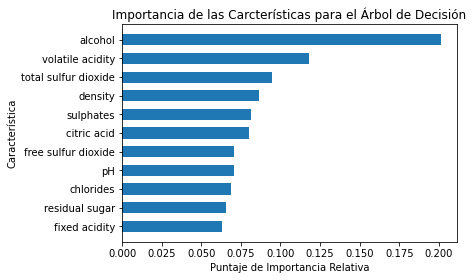

In [30]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Puntaje de Importancia Relativa')
plt.ylabel('Característica')
t = plt.title('Importancia de las Carcterísticas para el Árbol de Decisión')

## Visualizar el Árbol de Decisión

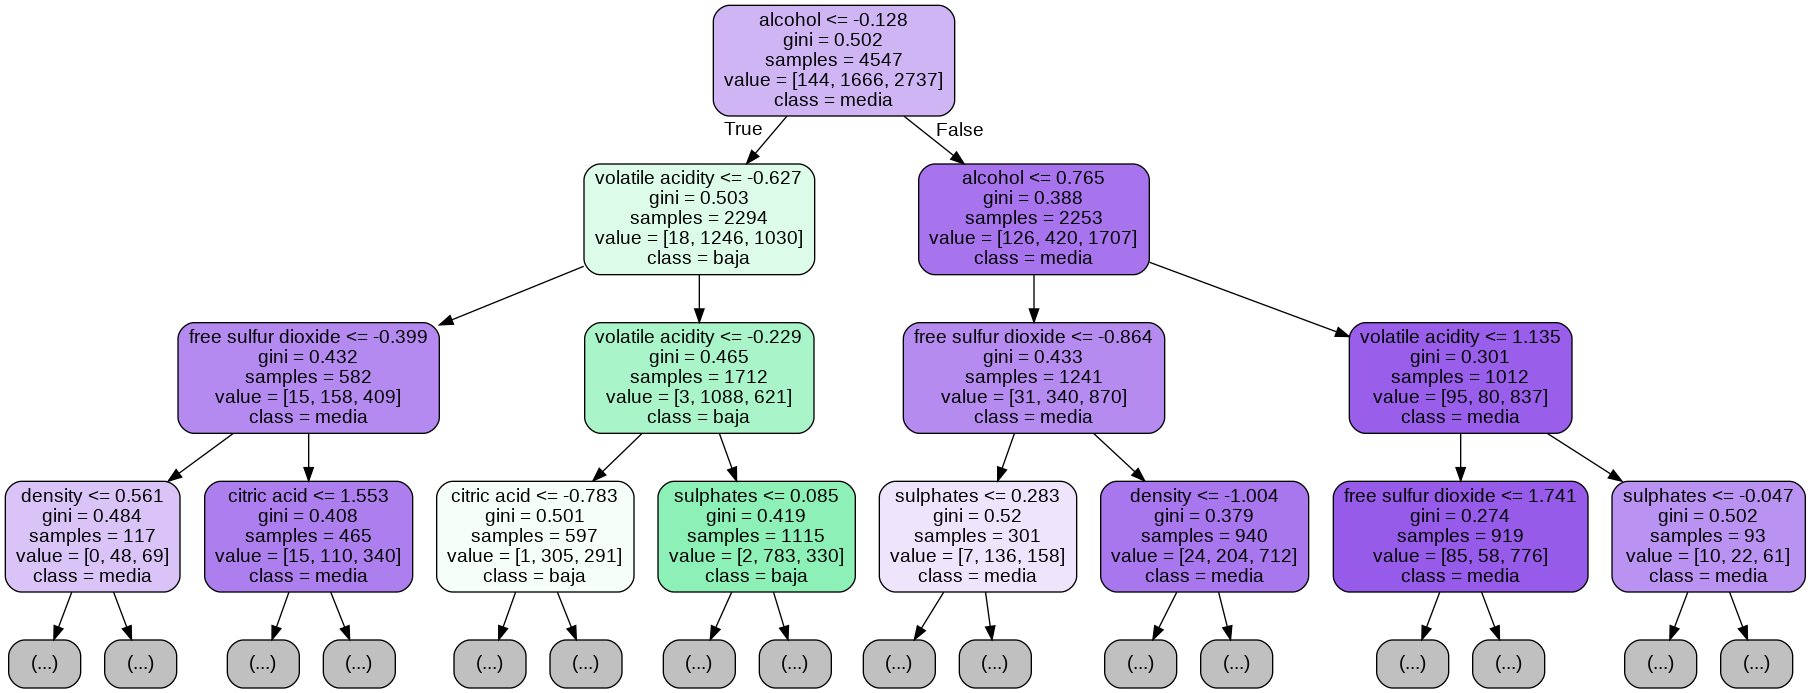

In [31]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=wqp_label_names,
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=wqp_feature_names, max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

## Entrenar, Predecir & Evaluar un Modelo using Random Forests

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        alta       0.94      0.28      0.43        54
        baja       0.79      0.72      0.75       718
       media       0.81      0.88      0.84      1178

    accuracy                           0.80      1950
   macro avg       0.84      0.63      0.67      1950
weighted avg       0.81      0.80      0.80      1950

[[  15    0   39]
 [   1  516  201]
 [   0  141 1037]]


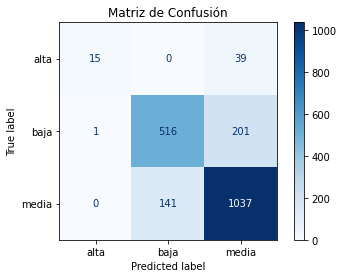

In [32]:
from sklearn.ensemble import RandomForestClassifier

wqp_rf = RandomForestClassifier()
wqp_rf.fit(wqp_train_SX, wqp_train_y)

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

disp = plot_confusion_matrix(wqp_rf, wqp_test_SX, wqp_test_y,
                                 display_labels=wqp_label_names,
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wqp_test_y,wqp_rf_predictions,labels=wqp_label_names))
print(disp.confusion_matrix)


## Ajuste de hiperparametros con Grid Search & Cross Validation

---



In [33]:
print(wqp_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Valores óptimos de los hiperparámetros

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,
                       scoring='accuracy')
wqp_clf.fit(wqp_train_SX, wqp_train_y)
print(wqp_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


### Resultados de Grid Search

In [35]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.7898 0.0088
{'max_features': 'auto', 'n_estimators': 200} 0.7865 0.0085
{'max_features': 'auto', 'n_estimators': 300} 0.7876 0.0085
{'max_features': 'auto', 'n_estimators': 500} 0.7906 0.0083
{'max_features': None, 'n_estimators': 100} 0.7876 0.0122
{'max_features': None, 'n_estimators': 200} 0.7882 0.0096
{'max_features': None, 'n_estimators': 300} 0.7867 0.0101
{'max_features': None, 'n_estimators': 500} 0.7854 0.0107
{'max_features': 'log2', 'n_estimators': 100} 0.7898 0.0088
{'max_features': 'log2', 'n_estimators': 200} 0.7865 0.0085
{'max_features': 'log2', 'n_estimators': 300} 0.7876 0.0085
{'max_features': 'log2', 'n_estimators': 500} 0.7906 0.0083


### Entrenar, Predecir & Evaluar un modelo de Random Forest Model con hiperparametros optimizados

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        alta       0.94      0.28      0.43        54
        baja       0.80      0.72      0.75       718
       media       0.81      0.89      0.85      1178

    accuracy                           0.81      1950
   macro avg       0.85      0.63      0.68      1950
weighted avg       0.81      0.81      0.80      1950

[[  15    1   38]
 [   0  514  204]
 [   1  131 1046]]


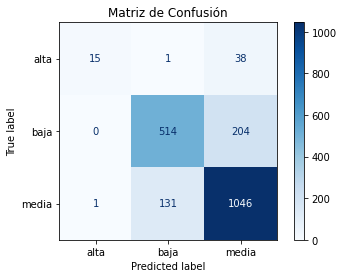

In [36]:
wqp_rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)
wqp_rf.fit(wqp_train_SX, wqp_train_y)

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

disp = plot_confusion_matrix(wqp_rf, wqp_test_SX, wqp_test_y,
                                 display_labels=wqp_label_names,
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wqp_test_y,wqp_rf_predictions,labels=wqp_label_names))
print(disp.confusion_matrix)


## Entrenar, Predecir & Evaluar un modelo usando Extreme Gradient Boosting

In [37]:
import os

mingw_path = r'C:\mingw-w64\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

### Entrenar el modelo

In [38]:
wqp_xgb_model = xgb.XGBClassifier(seed=42)
wqp_xgb_model.fit(wqp_train_SX, wqp_train_y)

XGBClassifier(objective='multi:softprob', seed=42)

### Predecir y Evaluar el modelo 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        alta       0.83      0.09      0.17        54
        baja       0.71      0.64      0.67       718
       media       0.76      0.84      0.80      1178

    accuracy                           0.74      1950
   macro avg       0.77      0.52      0.55      1950
weighted avg       0.74      0.74      0.73      1950

[[  5   1  48]
 [  1 456 261]
 [  0 187 991]]


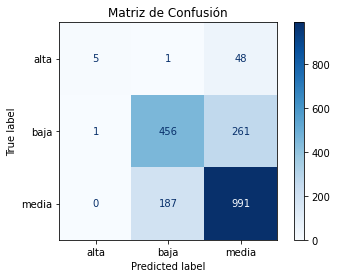

In [39]:
wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)

disp = plot_confusion_matrix(wqp_xgb_model, wqp_test_SX, wqp_test_y,
                                 display_labels=wqp_label_names,
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wqp_test_y,wqp_xgb_predictions,labels=wqp_label_names))
print(disp.confusion_matrix)


### Optimizar hiperparámetros

In [ ]:
param_grid = {
                'n_estimators': [100, 200, 300], 
                'max_depth': [5, 10, 15],
                'learning_rate': [0.3, 0.5]
              }

wqp_clf = GridSearchCV(xgb.XGBClassifier(tree_method='exact', seed=42), param_grid, 
                       cv=5, scoring='accuracy')
wqp_clf.fit(wqp_train_SX, wqp_train_y)
print(wqp_clf.best_params_)

### Resultados de Grid Search

In [ ]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

### Con hiperparámetros optimizados

In [ ]:
wqp_xgb_model = xgb.XGBClassifier(seed=42, max_depth=10, learning_rate=0.3, n_estimators=100)
wqp_xgb_model.fit(wqp_train_SX, wqp_train_y)

wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)

disp = plot_confusion_matrix(wqp_xgb_model, wqp_test_SX, wqp_test_y,
                                 display_labels=wqp_label_names,
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Matriz de Confusión')

print(classification_report(wqp_test_y,wqp_xgb_predictions,labels=wqp_label_names))
print(disp.confusion_matrix)


## Importancia de las características

In [ ]:
wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_rf_feature_importances), 
                                                          key=lambda x: x[1]))
# plot the feature importance plots
f, ax1 = plt.subplots(1, figsize=(10, 4))
t = f.suptitle('Feature Importances for XGBoost', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.6)
y_position = list(range(len(wqp_rf_feature_names)))
ax1.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center', tick_label=wqp_rf_feature_names)
ax1.set_title("Scikit-Learn")
ax1.set_xlabel('Relative Importance Score')
ax1.set_ylabel('Feature')


## Ejercicio

- Probar la clasificación de tipo de vino con un modelo de clasificación SVM (SVC) https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Probar con diferentes mejoras a los modelos anteriores: feature engineering, PCA, grid search con más variables, etc